In [1]:
import pandas as pd
melbourne_file_path = 'datasets/melbourne-housing-snapshot/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [2]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [3]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

In [4]:
# Selecting The Prediction Target
y = melbourne_data.Price
# Choosing "Features"
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [5]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [6]:
# Building Your Model
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [7]:
# Predict
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [8]:
# Model validation
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

In [9]:
#Train test split
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Retry
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

275189.7686679578


In [10]:
# Prevent overfitting by controlling tree depth
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# Experiment with diff depths
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271320


In [96]:
# Use Random forest 
# The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. 
# It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. 
# If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(f'Random forest: {round(mean_absolute_error(val_y, melb_preds)/1000,2)}K')


Random forest: 207.19K


In [112]:
# Try with an ANN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Normalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Create Keras model
normalizer = Normalization(axis=-1)
tf_model = Sequential([
    normalizer,
    Dense(10, activation='relu'),
    Dense(1)
])

tf_model.compile(loss='mean_absolute_error', optimizer=Adam(0.01))

In [113]:
# Train
history = tf_model.fit(train_X, train_y, epochs=100)

Epoch 1/100
146/146 [==============================] - 1s 4ms/step - loss: 1056542.5000
Epoch 2/100
146/146 [==============================] - 1s 4ms/step - loss: 1026122.8125
Epoch 3/100
146/146 [==============================] - 1s 5ms/step - loss: 971494.2500
Epoch 4/100
146/146 [==============================] - 1s 5ms/step - loss: 906773.6250
Epoch 5/100
146/146 [==============================] - 1s 5ms/step - loss: 832445.8125
Epoch 6/100
146/146 [==============================] - 1s 5ms/step - loss: 749655.1250
Epoch 7/100
146/146 [==============================] - 1s 5ms/step - loss: 674290.0625
Epoch 8/100
146/146 [==============================] - 1s 5ms/step - loss: 623891.8125
Epoch 9/100
146/146 [==============================] - 1s 6ms/step - loss: 593175.1250
Epoch 10/100
146/146 [==============================] - 1s 5ms/step - loss: 573373.1250
Epoch 11/100
146/146 [==============================] - 1s 5ms/step - loss: 559560.0000
Epoch 12/100
146/146 [=================

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_17 (Normaliza  (None, 5)                11        
 tion)                                                           
                                                                 
 dense_65 (Dense)            (None, 10)                60        
                                                                 
 dense_66 (Dense)            (None, 1)                 11        
                                                                 
Total params: 82
Trainable params: 71
Non-trainable params: 11
_________________________________________________________________


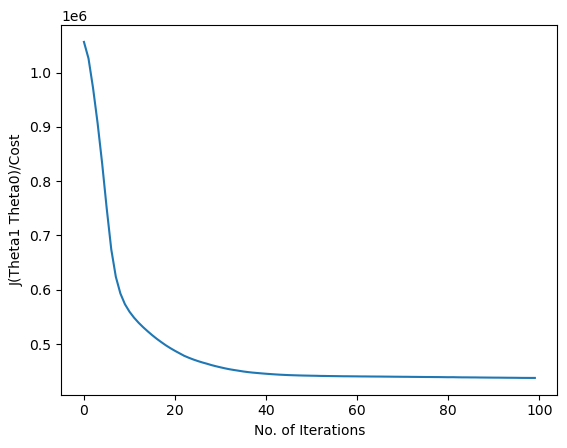

In [114]:
tf_model.summary()
plt.plot(history.history['loss'])
plt.xlabel("No. of Iterations")
plt.ylabel("J(Theta1 Theta0)/Cost")
plt.show()

In [115]:
melb_preds = tf_model.predict(val_X)
print(f'ANN: {round(mean_absolute_error(val_y, melb_preds)/1000,2)}K')

49/49 [==============================] - 0s 3ms/step
ANN: 472.88K


In [116]:
# Linear regression
linear_model = Sequential([
    normalizer,
    Dense(units=1)
])

linear_model.compile(
    optimizer=Adam(learning_rate=0.5),
    loss='mean_absolute_error')

history = linear_model.fit(
    train_X,
    train_y,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)




Epoch 1/100
117/117 [==============================] - 1s 5ms/step - loss: 1039918.4375 - val_loss: 1040162.4375
Epoch 2/100
117/117 [==============================] - 0s 4ms/step - loss: 1005139.8125 - val_loss: 1010201.6875
Epoch 3/100
117/117 [==============================] - 0s 4ms/step - loss: 973707.8750 - val_loss: 982911.0625
Epoch 4/100
117/117 [==============================] - 0s 4ms/step - loss: 944473.6875 - val_loss: 958804.5000
Epoch 5/100
117/117 [==============================] - 1s 4ms/step - loss: 916825.3750 - val_loss: 936316.4375
Epoch 6/100
117/117 [==============================] - 1s 5ms/step - loss: 890365.1875 - val_loss: 914265.8125
Epoch 7/100
117/117 [==============================] - 0s 4ms/step - loss: 864597.5625 - val_loss: 892992.0625
Epoch 8/100
117/117 [==============================] - 1s 5ms/step - loss: 839614.6250 - val_loss: 871875.3125
Epoch 9/100
117/117 [==============================] - 1s 6ms/step - loss: 815434.8125 - val_loss: 851557.56

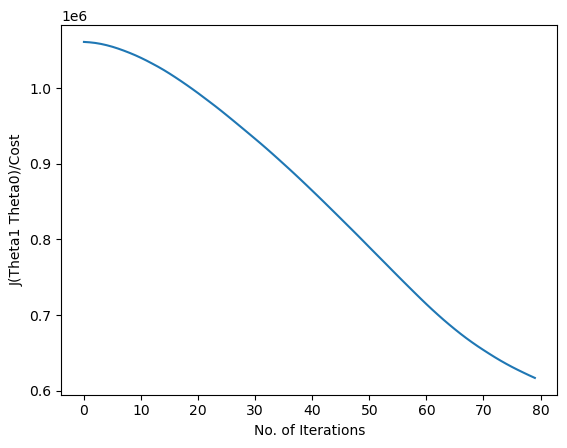

In [101]:
plt.plot(history.history['loss'])
plt.xlabel("No. of Iterations")
plt.ylabel("J(Theta1 Theta0)/Cost")
plt.show()

In [98]:
melb_preds = linear_model.predict(val_X)
print(f'Linear regression: {round(mean_absolute_error(val_y, melb_preds)/1000,2)}K')

49/49 [==============================] - 0s 2ms/step
Linear regression: 476.48K
